In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from pathlib import Path

from pipeline.features import get_merged_df, merge_segment_dfs
from pipeline import models, validation

base_path = Path('../../own_data/191104_depr_splits_features/')

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
feature_methods = [
    'env-alpha',
    'env-beta',
    'coh-alpha',
    'coh-beta',
    'bands'
]

In [5]:
model = models.LRScaled()

In [6]:
def plot_hist(scores):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    accs = np.array([score.acc for score in scores])
    roc_aucs = np.array([score.roc_auc for score in scores])
    axes[0].set_title('accuracy')
    axes[1].set_title('roc-auc')
    for ax, values in zip(axes, (accs, roc_aucs)):
        _, bins, _ = ax.hist(values, bins='auto')
        ax.set_xticks(bins)
        ax.grid()
        ax.legend([f"mean={values.mean():4f}, std={values.std():4f}"], loc='lower center')


# Проверка признаков на отложенной выборке

In [7]:
dir = '60s_0_0_60'
df = get_merged_df(base_path/dir, feature_methods)
features = list(df.columns.difference(['fn', 'target']))
df

,env_alpha_t6_t4,env_alpha_t6_o1,env_alpha_t6_f8,env_alpha_t6_p4,env_alpha_t6_c4,env_alpha_t6_t3,env_alpha_t6_f7,env_alpha_t6_f3,env_alpha_t6_o2,env_alpha_t6_f4,...,bands_theta_fp2,bands_gamma_fp2,bands_alpha_pz,bands_beta_pz,bands_theta_pz,bands_gamma_pz,bands_alpha_fz,bands_beta_fz,bands_theta_fz,bands_gamma_fz
0,0.862693,0.515216,0.597170,0.892104,0.642351,0.569337,0.518653,0.411284,0.817264,0.485622,...,94.650867,221.493898,90.112141,120.829028,32.557097,27.690337,49.284144,75.045404,37.092665,29.114363
1,0.437437,0.699828,0.261864,0.845655,0.325365,0.078983,0.108343,0.403305,0.895111,0.282967,...,91.135152,29.573109,825.425073,838.467649,87.501929,14.972101,42.288742,59.460554,34.849155,6.850115
2,0.564926,0.696259,0.265468,0.907501,0.410815,0.333372,0.343069,0.385072,0.845697,0.272360,...,105.822958,49.028662,640.294141,20269.218699,941.119542,39.151326,78.004301,53.067848,60.569653,13.471286
3,0.523941,0.769406,-0.016689,0.949468,-0.070275,0.239563,-0.001990,0.096925,0.885606,0.143562,...,247.954976,46.704146,1324.318521,14798.067521,274.858787,30.382727,1049.588928,107.891124,145.558790,23.918301
4,0.530864,0.226952,0.293295,0.618569,0.365164,0.187277,0.208643,0.209183,0.499577,0.263025,...,80.478366,70.342152,23.162862,2246.308997,9.790126,6.412085,260.514405,1156.551266,52.207551,24.711249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.446858,0.465157,0.150910,0.789593,0.106794,0.116491,0.111402,0.041805,0.709499,0.046633,...,105.255391,156.145453,78.444083,157.645620,65.465294,37.473752,66.508053,143.673649,61.748589,46.513611
85,0.301243,0.500051,0.110041,0.741535,0.045796,0.173605,0.095400,0.053224,0.823173,0.071867,...,66.533397,299.314107,49.412999,192.420471,18.123313,30.966762,40.829576,120.024347,15.355826,35.366264
86,0.343118,0.590068,0.161810,0.802504,0.620991,0.343715,0.066853,0.051159,0.639965,0.061190,...,75.070823,29.804375,106.234422,112.659853,47.609730,9.156584,55.635247,60.968634,36.774867,15.823247
87,0.818389,0.553945,0.430525,0.882814,0.572252,0.398328,0.277199,0.118287,0.857535,0.100898,...,168.878925,54.552922,383.953222,448.626625,306.882736,13.343097,277.874964,721.961541,163.576259,27.778256


In [133]:
scores = validation.get_repeated_scores(validation.train_test_val, df, features, model, random_state=57, n_repeats=50, p_bar=0)

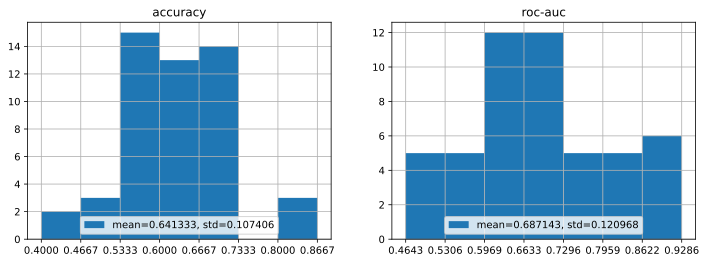

In [149]:
plot_hist(scores)

## Проверка качества на разных временных промежутках

In [6]:
dir_10 = '10s_0_0_10'
dir_20 = '20s_1_20_40'
dir_30 = '30s_0_30_60'
df_10 = get_merged_df(base_path/dir_10, feature_methods)
df_20 = get_merged_df(base_path/dir_20, feature_methods)
df_30 = get_merged_df(base_path/dir_30, feature_methods)

In [155]:
scores_10 = validation.get_repeated_scores(validation.train_test_val, df_10, features, model, random_state=57, n_repeats=25, p_bar=0)
scores_20 = validation.get_repeated_scores(validation.train_test_val, df_20, features, model, random_state=58, n_repeats=25, p_bar=0)
scores_30 = validation.get_repeated_scores(validation.train_test_val, df_30, features, model, random_state=59, n_repeats=25, p_bar=0)

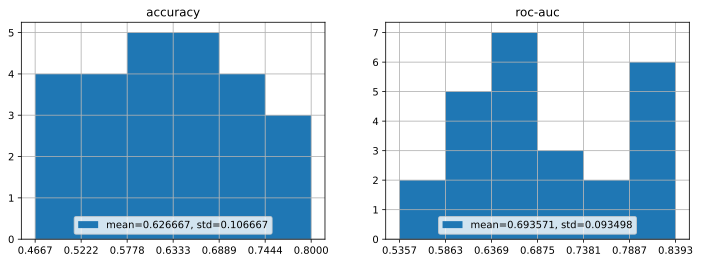

In [156]:
plot_hist(scores_10)

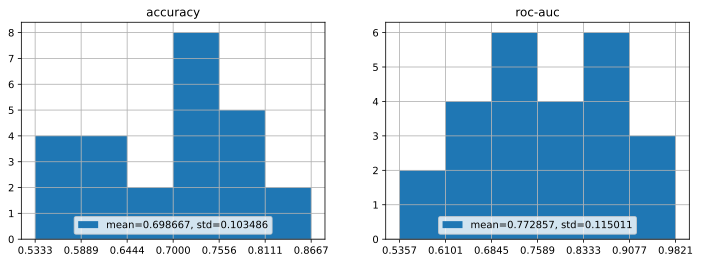

In [157]:
plot_hist(scores_20)

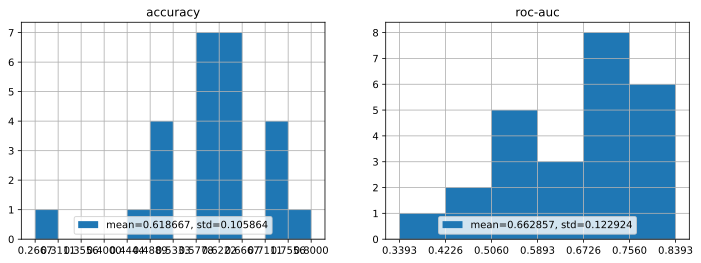

In [158]:
plot_hist(scores_30)

# Расширение выборки данными с разных сегментов

In [13]:
df_combined = merge_segment_dfs([df, df_10, df_20])
df_combined

,env_alpha_t6_t4,env_alpha_t6_o1,env_alpha_t6_f8,env_alpha_t6_p4,env_alpha_t6_c4,env_alpha_t6_t3,env_alpha_t6_f7,env_alpha_t6_f3,env_alpha_t6_o2,env_alpha_t6_f4,...,bands_gamma_fp2,bands_alpha_pz,bands_beta_pz,bands_theta_pz,bands_gamma_pz,bands_alpha_fz,bands_beta_fz,bands_theta_fz,bands_gamma_fz,segment_id
0,0.862693,0.515216,0.597170,0.892104,0.642351,0.569337,0.518653,0.411284,0.817264,0.485622,...,221.493898,90.112141,120.829028,32.557097,27.690337,49.284144,75.045404,37.092665,29.114363,0
1,0.437437,0.699828,0.261864,0.845655,0.325365,0.078983,0.108343,0.403305,0.895111,0.282967,...,29.573109,825.425073,838.467649,87.501929,14.972101,42.288742,59.460554,34.849155,6.850115,0
2,0.564926,0.696259,0.265468,0.907501,0.410815,0.333372,0.343069,0.385072,0.845697,0.272360,...,49.028662,640.294141,20269.218699,941.119542,39.151326,78.004301,53.067848,60.569653,13.471286,0
3,0.523941,0.769406,-0.016689,0.949468,-0.070275,0.239563,-0.001990,0.096925,0.885606,0.143562,...,46.704146,1324.318521,14798.067521,274.858787,30.382727,1049.588928,107.891124,145.558790,23.918301,0
4,0.530864,0.226952,0.293295,0.618569,0.365164,0.187277,0.208643,0.209183,0.499577,0.263025,...,70.342152,23.162862,2246.308997,9.790126,6.412085,260.514405,1156.551266,52.207551,24.711249,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.400954,0.463247,0.388368,0.861618,0.260607,0.148005,0.214685,0.026452,0.708472,0.034785,...,103.340910,96.480821,145.908798,69.591648,29.494296,62.902846,136.169178,78.180985,50.376513,2
263,0.493672,0.696176,0.243399,0.832831,0.163621,0.109521,0.191560,0.210217,0.875362,0.053452,...,436.845450,63.703738,258.579956,15.929899,19.604791,57.986739,110.368751,12.541750,26.105073,2
264,0.340154,0.455658,0.144209,0.847692,0.665161,0.184116,0.029347,0.150269,0.823241,-0.005201,...,32.718718,129.769074,81.445744,50.296491,8.144937,67.090563,52.898890,46.293486,15.089744,2
265,0.812553,0.463151,0.496344,0.831211,0.554297,0.461849,0.368699,0.149929,0.763753,0.224697,...,58.539854,485.227504,440.177838,280.373300,11.844893,300.933623,701.575866,202.709801,27.130196,2


In [30]:
scores = validation.get_repeated_scores(validation.multi_segment_train_test, df_combined, features, model, random_state=57, n_repeats=50, p_bar=1)

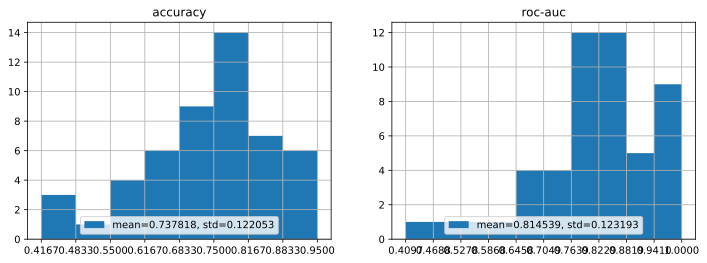

In [32]:
plot_hist(scores)

# Оптимизация accuracy при отборе признаков

In [8]:
scores = validation.get_repeated_scores(validation.train_test_val, df, features, model, random_state=57, n_repeats=50, p_bar=1, metric='acc')

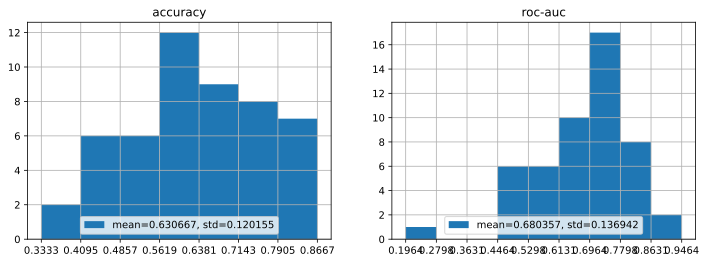

In [9]:
plot_hist(scores)